In [36]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(type(housing))
print(dir(housing))

<class 'sklearn.utils.Bunch'>
['DESCR', 'data', 'feature_names', 'target']


In [37]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [38]:
print(type(housing.data))
print(housing.data.shape)

<class 'numpy.ndarray'>
(20640, 8)


In [39]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [40]:
print(type(housing.target))
print(housing.target.shape)

<class 'numpy.ndarray'>
(20640,)


In [41]:
import numpy as np
idx = np.arange(20640)
np.random.shuffle(idx)
x_train = housing.data[idx[:15000]] 
y_train = housing.target[idx[:15000]] 
x_test = housing.data[idx[15000:]] 
y_test = housing.target[idx[15000:]] 
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(15000, 8) (15000,)
(5640, 8) (5640,)


In [42]:
import tensorflow as tf
import numpy as np
tf.reset_default_graph()
tf.set_random_seed(0)
np.random.seed(0)

In [43]:
m, n = x_train.shape
#design_matrix = np.c_[np.ones((m, 1)), x_train]
design_matrix = np.concatenate([np.ones((m, 1)), x_train], axis=1)
A = tf.constant(design_matrix, dtype=tf.float32, name="A")
y_train_tensor = tf.constant(y_train.reshape((-1, 1)), dtype=tf.float32, name="y")
AT = tf.transpose(A)
theta = tf.matrix_inverse(AT@A)@(AT@y_train_tensor)
theta_w = theta[1:,:] 
theta_b = theta[0,:]
x = tf.placeholder(tf.float32, [None, 8])
y_pred = x@theta_w + theta_b

In [44]:
with tf.Session() as sess:
    feed_dict = {x: x_test}
    y_test_pred = sess.run(y_pred, feed_dict=feed_dict)

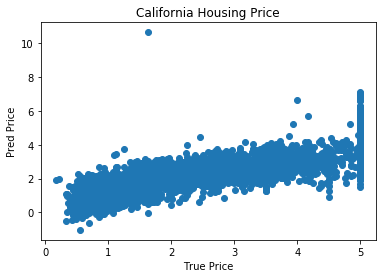

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(y_test, y_test_pred, 'o')
plt.xlabel('True Price')
plt.ylabel('Pred Price')
plt.title('California Housing Price')
plt.show()